
# Classification with the German Traffic Sign Recognition Benchmark.


In [1]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Load data and preprocessing

In [2]:
from packages.gtrsb import readTrafficSigns

In [3]:
classes = [3, 7, 13, 14]
tracks = {3: 5, 7: 40, 13: 24, 14: 8}
trainImages, trainDims, trainROIs, trainLabels, filenames = readTrafficSigns('./data', classes, tracks)

120
(30, 29)
((6, 5), (25, 24))
3


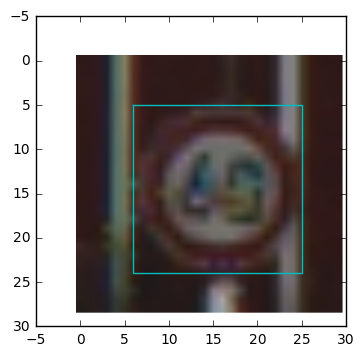

In [12]:
print(len(trainImages))
plt.imshow(trainImages[0]);
print(trainDims[0])
print(trainROIs[0])
roi = trainROIs[0]
p1, p2 = roi
x1, y1 = p1
x2, y2 = p2
plt.plot([x1,x2,x2,x1,x1],[y1,y1,y2,y2,y1],'c')
print(trainLabels[0])

In [14]:
from numpy import histogram, interp
def histeq(im,nbr_bins=256):
    imhist, bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() #cumulative distribution function
    cdf = 255 * cdf / cdf[-1] #normalize
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf 

from scipy.misc import imresize
def processImage(img, roi):
    crop_img = img[roi[0][0]:roi[1][0],roi[0][1]:roi[1][1],:]
    planes = crop_img.shape[2]
    sc_img = imresize(crop_img,(10,10,planes))
    R_img = sc_img[:,:,0]
    eq_img, cdf = histeq(R_img)
    return (eq_img-128)/256

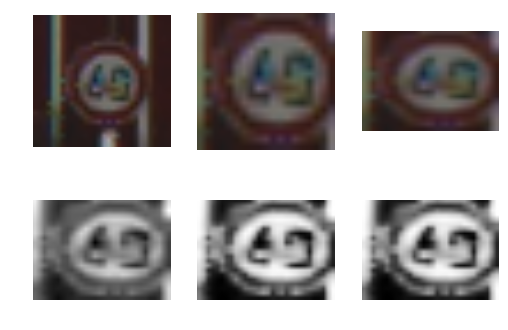

In [25]:
from scipy.misc import imresize

img = trainImages[0]
crop_img = img[x1:x2,y1:y2,:]
dx, dy = 22,30
sc_img = imresize(crop_img, (dx,dy,3))
R_img = sc_img[:,:,0]
eq_img, cdf = histeq(R_img)
norm_img = 2*(eq_img - 128) / 256

plt.subplot(231)
plt.imshow(img)
plt.axis('off')
plt.subplot(232)
plt.imshow(crop_img)
plt.axis('off')
plt.subplot(233)
plt.imshow(sc_img)
plt.axis('off')
plt.subplot(234)
plt.imshow(R_img, cmap='gray')
plt.axis('off')
plt.subplot(235)
plt.imshow(eq_img, cmap='gray')
plt.axis('off')
plt.subplot(236)
plt.imshow(norm_img, cmap='gray')
plt.axis('off');


In [ ]:
for i in range(120):
    eq_img = processImage(trainImages[i],trainROIs[i])
    inpt = eq_img.reshape(1,100)
    target = class_labels.index(trainLabels[i])
    X.append(inpt)
    y.append(target)


## Build the model and train

In [ ]:
net = MLPClassifier(solver='sgd',\
                    hidden_layer_sizes=(50, ),\
                    max_iter=4000)

In [ ]:
net.fit(X_train, y_train)

## Analysis of the network

### Classification report

In [ ]:
expected = y_test
predicted = net.predict(X_test)
print(metrics.classification_report(expected, predicted))

### Confusion matrix

In [ ]:
print(metrics.confusion_matrix(expected, predicted))

### Loss curve

In [ ]:
plt.plot(net.loss_curve_);
plt.xlabel('Iterations');
plt.ylabel('Loss');